In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

## Data Reading & Understanding

In [2]:
telecom = pd.read_csv('telecom_churn_data.csv')
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [3]:
# Performing a describe on telecom data
telecom.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


In [4]:
# Let's check the info of the dataframe
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [5]:
# Identifying the columns with missing values
for col in telecom.columns:
 if telecom[col].isnull().any() == True:
    print(col,":",telecom[col].isnull().sum())

loc_og_t2o_mou : 1018
std_og_t2o_mou : 1018
loc_ic_t2o_mou : 1018
last_date_of_month_7 : 601
last_date_of_month_8 : 1100
last_date_of_month_9 : 1659
onnet_mou_6 : 3937
onnet_mou_7 : 3859
onnet_mou_8 : 5378
onnet_mou_9 : 7745
offnet_mou_6 : 3937
offnet_mou_7 : 3859
offnet_mou_8 : 5378
offnet_mou_9 : 7745
roam_ic_mou_6 : 3937
roam_ic_mou_7 : 3859
roam_ic_mou_8 : 5378
roam_ic_mou_9 : 7745
roam_og_mou_6 : 3937
roam_og_mou_7 : 3859
roam_og_mou_8 : 5378
roam_og_mou_9 : 7745
loc_og_t2t_mou_6 : 3937
loc_og_t2t_mou_7 : 3859
loc_og_t2t_mou_8 : 5378
loc_og_t2t_mou_9 : 7745
loc_og_t2m_mou_6 : 3937
loc_og_t2m_mou_7 : 3859
loc_og_t2m_mou_8 : 5378
loc_og_t2m_mou_9 : 7745
loc_og_t2f_mou_6 : 3937
loc_og_t2f_mou_7 : 3859
loc_og_t2f_mou_8 : 5378
loc_og_t2f_mou_9 : 7745
loc_og_t2c_mou_6 : 3937
loc_og_t2c_mou_7 : 3859
loc_og_t2c_mou_8 : 5378
loc_og_t2c_mou_9 : 7745
loc_og_mou_6 : 3937
loc_og_mou_7 : 3859
loc_og_mou_8 : 5378
loc_og_mou_9 : 7745
std_og_t2t_mou_6 : 3937
std_og_t2t_mou_7 : 3859
std_og_t2t_mou_

In [6]:
# Printing the percentage of missing values if columns have any
for col in telecom.columns:
 if telecom[col].isnull().any() == True:
    print(col,":",round(100*(telecom[col].isnull().sum()/len(telecom.index)), 4))

loc_og_t2o_mou : 1.018
std_og_t2o_mou : 1.018
loc_ic_t2o_mou : 1.018
last_date_of_month_7 : 0.601
last_date_of_month_8 : 1.1
last_date_of_month_9 : 1.659
onnet_mou_6 : 3.937
onnet_mou_7 : 3.859
onnet_mou_8 : 5.3781
onnet_mou_9 : 7.7451
offnet_mou_6 : 3.937
offnet_mou_7 : 3.859
offnet_mou_8 : 5.3781
offnet_mou_9 : 7.7451
roam_ic_mou_6 : 3.937
roam_ic_mou_7 : 3.859
roam_ic_mou_8 : 5.3781
roam_ic_mou_9 : 7.7451
roam_og_mou_6 : 3.937
roam_og_mou_7 : 3.859
roam_og_mou_8 : 5.3781
roam_og_mou_9 : 7.7451
loc_og_t2t_mou_6 : 3.937
loc_og_t2t_mou_7 : 3.859
loc_og_t2t_mou_8 : 5.3781
loc_og_t2t_mou_9 : 7.7451
loc_og_t2m_mou_6 : 3.937
loc_og_t2m_mou_7 : 3.859
loc_og_t2m_mou_8 : 5.3781
loc_og_t2m_mou_9 : 7.7451
loc_og_t2f_mou_6 : 3.937
loc_og_t2f_mou_7 : 3.859
loc_og_t2f_mou_8 : 5.3781
loc_og_t2f_mou_9 : 7.7451
loc_og_t2c_mou_6 : 3.937
loc_og_t2c_mou_7 : 3.859
loc_og_t2c_mou_8 : 5.3781
loc_og_t2c_mou_9 : 7.7451
loc_og_mou_6 : 3.937
loc_og_mou_7 : 3.859
loc_og_mou_8 : 5.3781
loc_og_mou_9 : 7.7451
std_

In [7]:
# Imputing recharge anount columns with null values
# We don't want to drop them because their information is crucial for identifying churn
telecom['total_rech_data_6'] = telecom['total_rech_data_6'].replace(np.NaN,0.0)
telecom['total_rech_data_7'] = telecom['total_rech_data_7'].replace(np.NaN,0.0)
telecom['total_rech_data_8'] = telecom['total_rech_data_8'].replace(np.NaN,0.0)
telecom['av_rech_amt_data_6'] = telecom['av_rech_amt_data_6'].replace(np.NaN,0.0)
telecom['av_rech_amt_data_7'] = telecom['av_rech_amt_data_7'].replace(np.NaN,0.0)
telecom['av_rech_amt_data_8'] = telecom['av_rech_amt_data_8'].replace(np.NaN,0.0)
telecom['total_rech_amt_data_6'] = telecom.av_rech_amt_data_6 * telecom.total_rech_data_6
telecom['total_rech_amt_data_7'] = telecom.av_rech_amt_data_7 * telecom.total_rech_data_7
telecom['total_rech_amt_data_8'] = telecom.av_rech_amt_data_8 * telecom.total_rech_data_8
telecom[['total_rech_amt_data_6','total_rech_amt_data_7']] = telecom[['total_rech_amt_data_6','total_rech_amt_data_7']].fillna(0)

telecom['rech_avg'] = telecom[['total_rech_amt_6','total_rech_amt_data_6','total_rech_amt_7','total_rech_amt_data_7']].apply(lambda x: (x['total_rech_amt_data_6']+x['total_rech_amt_6'] + x['total_rech_amt_data_7']+x['total_rech_amt_7'])/2,axis=1)

In [8]:
# Dropping columns with higher null-value percentage
per_list = []
for i,col in enumerate(telecom.columns):
    percentage = round(100*(telecom[col].isnull().sum()/len(telecom.index)),2)
    if percentage > 40:
        per_list.append(col)
        print(i, col,'\t',percentage)            
telecom_clean = telecom.drop(per_list, axis =1)

157 date_of_last_rech_data_6 	 74.85
158 date_of_last_rech_data_7 	 74.43
159 date_of_last_rech_data_8 	 73.66
160 date_of_last_rech_data_9 	 74.08
164 total_rech_data_9 	 74.08
165 max_rech_data_6 	 74.85
166 max_rech_data_7 	 74.43
167 max_rech_data_8 	 73.66
168 max_rech_data_9 	 74.08
169 count_rech_2g_6 	 74.85
170 count_rech_2g_7 	 74.43
171 count_rech_2g_8 	 73.66
172 count_rech_2g_9 	 74.08
173 count_rech_3g_6 	 74.85
174 count_rech_3g_7 	 74.43
175 count_rech_3g_8 	 73.66
176 count_rech_3g_9 	 74.08
180 av_rech_amt_data_9 	 74.08
189 arpu_3g_6 	 74.85
190 arpu_3g_7 	 74.43
191 arpu_3g_8 	 73.66
192 arpu_3g_9 	 74.08
193 arpu_2g_6 	 74.85
194 arpu_2g_7 	 74.43
195 arpu_2g_8 	 73.66
196 arpu_2g_9 	 74.08
197 night_pck_user_6 	 74.85
198 night_pck_user_7 	 74.43
199 night_pck_user_8 	 73.66
200 night_pck_user_9 	 74.08
217 fb_user_6 	 74.85
218 fb_user_7 	 74.43
219 fb_user_8 	 73.66
220 fb_user_9 	 74.08


In [9]:
telecom_clean[['total_rech_amt_6','total_rech_amt_7', 'rech_avg']].head()

,total_rech_amt_6,total_rech_amt_7,rech_avg
0,362,252,559.0
1,74,384,306.0
2,168,315,241.5
3,230,310,270.0
4,196,350,301.0


### Deriving new features for filtering high value customers
Based on the 70th percentile score of avergae recharge amount for Month-6 & 7, we will have to filter the high-value customers.  

In [10]:
# Fetching the 70th percentile of avg. recharge amount
per_70 = telecom_clean.rech_avg.quantile(0.7)
print(per_70)

478.0


In [11]:
telecom_hv = telecom_clean.loc[telecom_clean['rech_avg']>=per_70]
print("Number of records:",len(telecom_hv.index))
print("No. of features: ", len(telecom_hv.columns))

Number of records: 30001
No. of features:  196


In [12]:
# Printing the list of features
"', '".join(telecom_hv.columns)

"mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'offnet_mou_9', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_ic_mou_9', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'roam_og_mou_9', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'loc_og_mou_9', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2t_mou_9', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_

In [13]:
# Dropping irrelevant columns
date_cols = ['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9']
telecom_hv = telecom_hv.drop(date_cols, axis=1)
print("No. of features: ", len(telecom_hv.columns))

No. of features:  192


#### Now let's extract the day from the 'date_of_last_rech' columns

In [14]:
from dateutil.parser import parse

In [15]:
telecom_hv[['date_of_last_rech_6']].head()

,date_of_last_rech_6
0,6/21/2014
7,6/27/2014
8,6/25/2014
21,6/30/2014
23,6/18/2014


In [16]:
# Extracting day from dates of last recharge across all the months
# telecom_hv[['date_of_last_rech_6']].apply(lambda x: parse(x).dt.date)
telecom_hv['date_of_last_rech_6']  = pd.to_datetime(telecom_hv['date_of_last_rech_6'],format='%m/%d/%Y').dt.day
telecom_hv['date_of_last_rech_7'] = pd.to_datetime(telecom_hv['date_of_last_rech_7'],format='%m/%d/%Y').dt.day
telecom_hv['date_of_last_rech_8'] = pd.to_datetime(telecom_hv['date_of_last_rech_8'],format='%m/%d/%Y').dt.day
telecom_hv['date_of_last_rech_9'] = pd.to_datetime(telecom_hv['date_of_last_rech_9'],format='%m/%d/%Y').dt.day
# day = [x for x in parse(telecom_hv['date_of_last_rech_6']).day]

In [17]:
telecom_hv[['date_of_last_rech_6']].head()

,date_of_last_rech_6
0,21.0
7,27.0
8,25.0
21,30.0
23,18.0


In [18]:
telecom_hv = telecom_hv.drop(['circle_id'], axis = 1)

In [19]:
# Making a list of 'mou' columns which are having '0' as the only values
mou = ['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 
       'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 
       'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9']

In [20]:
# Dropping mou columns
telecom_hv = telecom_hv.drop(mou, axis = 1)
len(telecom_hv.columns)

180

In [21]:
# Checking null value percentage in columns, again
for col in telecom_hv.columns:
 if telecom_hv[col].isnull().any() == True:
    print(col,":",round(100*(telecom_hv[col].isnull().sum()/len(telecom_hv.index)), 4))

onnet_mou_6 : 1.8166
onnet_mou_7 : 1.7899
onnet_mou_8 : 3.9132
onnet_mou_9 : 6.3365
offnet_mou_6 : 1.8166
offnet_mou_7 : 1.7899
offnet_mou_8 : 3.9132
offnet_mou_9 : 6.3365
roam_ic_mou_6 : 1.8166
roam_ic_mou_7 : 1.7899
roam_ic_mou_8 : 3.9132
roam_ic_mou_9 : 6.3365
roam_og_mou_6 : 1.8166
roam_og_mou_7 : 1.7899
roam_og_mou_8 : 3.9132
roam_og_mou_9 : 6.3365
loc_og_t2t_mou_6 : 1.8166
loc_og_t2t_mou_7 : 1.7899
loc_og_t2t_mou_8 : 3.9132
loc_og_t2t_mou_9 : 6.3365
loc_og_t2m_mou_6 : 1.8166
loc_og_t2m_mou_7 : 1.7899
loc_og_t2m_mou_8 : 3.9132
loc_og_t2m_mou_9 : 6.3365
loc_og_t2f_mou_6 : 1.8166
loc_og_t2f_mou_7 : 1.7899
loc_og_t2f_mou_8 : 3.9132
loc_og_t2f_mou_9 : 6.3365
loc_og_t2c_mou_6 : 1.8166
loc_og_t2c_mou_7 : 1.7899
loc_og_t2c_mou_8 : 3.9132
loc_og_t2c_mou_9 : 6.3365
loc_og_mou_6 : 1.8166
loc_og_mou_7 : 1.7899
loc_og_mou_8 : 3.9132
loc_og_mou_9 : 6.3365
std_og_t2t_mou_6 : 1.8166
std_og_t2t_mou_7 : 1.7899
std_og_t2t_mou_8 : 3.9132
std_og_t2t_mou_9 : 6.3365
std_og_t2m_mou_6 : 1.8166
std_og_t2m

In [22]:
# Let's define categorical columns so that we can use them somewhere
categorical = ['monthly_2g_6','monthly_2g_7','monthly_2g_8','monthly_2g_9','sachet_2g_6','sachet_2g_7',
 'sachet_2g_8','sachet_2g_9','monthly_3g_6','monthly_3g_7','monthly_3g_8','monthly_3g_9',
 'sachet_3g_6','sachet_3g_7','sachet_3g_8','sachet_3g_9']

In [23]:
telecom_hv[categorical].describe()

,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9
count,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000
mean,0.174494,0.183261,0.153628,0.132562,1.066064,1.214026,1.054865,0.817606,0.217759,0.229026,0.211026,0.219226,0.209393,0.227492,0.202393,0.194427
std,0.434953,0.450423,0.406486,0.382178,2.507197,2.736158,2.535940,1.979713,0.613199,0.659125,0.617549,0.615390,0.985674,1.089929,1.100107,1.051711
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.000000,5.000000,5.000000,4.000000,42.000000,48.000000,44.000000,40.000000,14.000000,16.000000,16.000000,11.000000,29.000000,35.000000,41.000000,49.000000


In [24]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

In [25]:
telecom_hv.describe()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,rech_avg
count,3.000100e+04,30001.000000,30001.000000,30001.000000,30001.000000,29456.000000,29464.000000,28827.000000,28100.000000,29456.000000,29464.000000,28827.000000,28100.000000,29456.000000,29464.000000,28827.000000,28100.000000,29456.000000,29464.000000,28827.000000,28100.000000,29456.000000,29464.000000,28827.000000,28100.000000,29456.000000,29464.000000,28827.000000,28100.000000,29456.000000,29464.000000,28827.000000,28100.000000,29456.000000,29464.000000,28827.000000,28100.000000,29456.000000,29464.000000,28827.000000,28100.000000,29456.000000,29464.000000,28827.000000,28100.000000,29456.000000,29464.000000,28827.000000,28100.000000,29456.000000,29464.000000,28827.000000,28100.000000,29456.000000,29464.000000,28827.000000,28100.000000,29456.000000,29464.000000,28827.000000,28100.000000,29456.000000,29464.000000,28827.000000,28100.000000,29456.000000,29464.000000,28827.000000,28100.000000,30001.000000,30001.000000,30001.000000,30001.000000,29456.000000,29464.000000,28827.000000,28100.000000,29456.000000,29464.000000,28827.000000,28100.000000,29456.000000,29464.000000,28827.000000,28100.000000,29456.000000,29464.000000,28827.000000,28100.000000,29456.000000,29464.000000,28827.000000,28100.000000,29456.000000,29464.000000,28827.000000,28100.000000,29456.000000,29464.000000,28827.000000,28100.000000,29456.000000,29464.000000,28

### Identifying Customer Churn
Based on certain conditions as mentioned problem statement, we have to define the customer churn. Those who have not made any calls (either incoming or outgoing) and have not used mobile internet even once in the churn phase, will be identified as churn customers

In [26]:
#  total_ic_mou_9, total_og_mou_9, vol_2g_mb_9, vol_3g_mb_9 
# (Above features summed together in the derived features: total_derived_calls_9, total_data_derived_9)
def churn(x):
    x1=x[0]
    x2=x[1]
    if x1 == 0 and x2 == 0:
        return 1
    else: return 0

In [27]:
# Derive New Features
telecom_hv['total_derived_calls_9'] = telecom_hv['total_ic_mou_9']+ telecom_hv['total_og_mou_9']
telecom_hv['total_data_derived_9'] = telecom_hv['vol_3g_mb_9'] + telecom_hv['vol_2g_mb_9']

In [28]:
# Defining churn
telecom_hv['churn'] = telecom_hv[['total_derived_calls_9','total_data_derived_9']].apply(churn, axis=1)

In [29]:
telecom_hv[telecom_hv['churn']==1][['total_derived_calls_9','total_data_derived_9','churn']].head()

,total_derived_calls_9,total_data_derived_9,churn
0,0.0,0.0,1
7,0.0,0.0,1
67,0.0,0.0,1
86,0.0,0.0,1
111,0.0,0.0,1


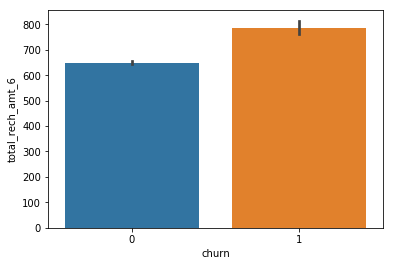

In [30]:
# Data Visualization
ax = sns.barplot(x='churn', y = 'total_rech_amt_6', data = telecom_hv)

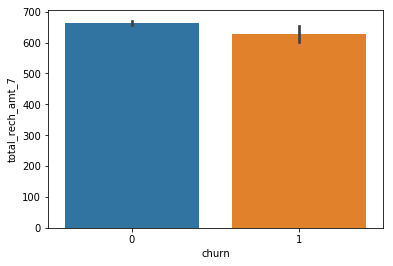

In [31]:
ax2 = sns.barplot(x='churn', y = 'total_rech_amt_7', data = telecom_hv)

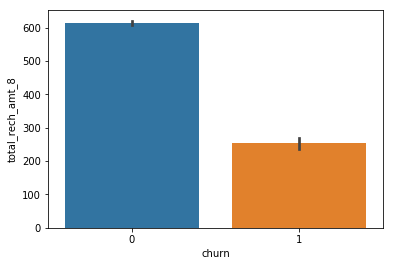

In [32]:
ax3 = sns.barplot(x='churn', y = 'total_rech_amt_8', data = telecom_hv)

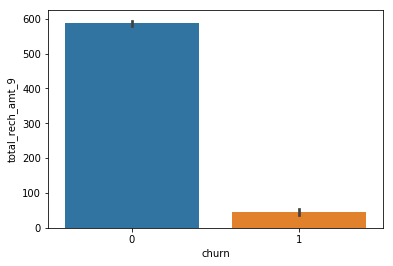

In [33]:
ax4 = sns.barplot(x='churn', y = 'total_rech_amt_9', data = telecom_hv)

<b> From the above plots, we can see that the churn-rate keeps on decreasing, as the customers proceed towards the churn phase. Also, the total recharge amount gradually keeps on decreasing for high-churn customers. That means they are gradually leaving current telecom service provider </b>

Text(0.5, 1.0, 'Customers by their tenure')

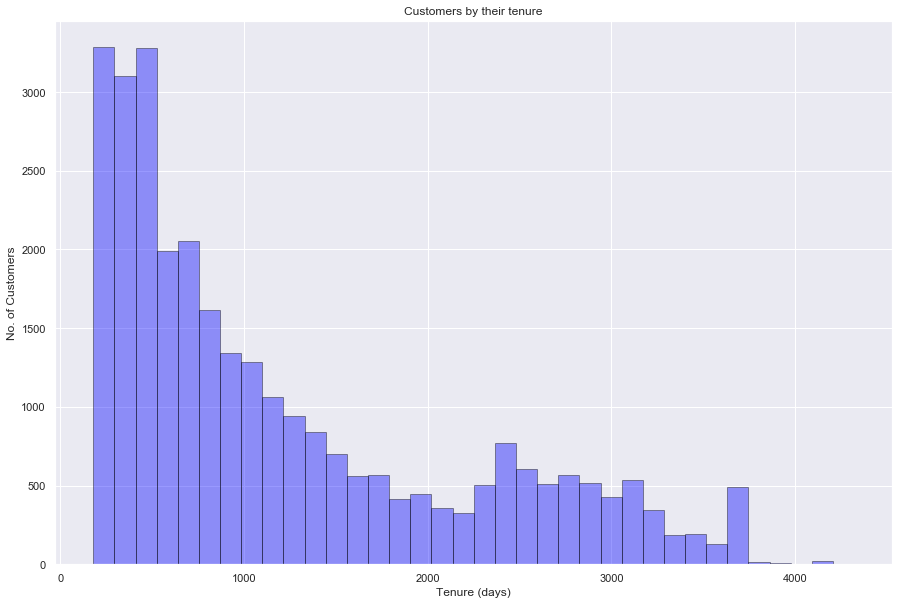

In [109]:
ax = sns.distplot(telecom_hvo['aon'], hist=True, kde=False, 
             bins=int(180/5), color = 'blue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('No. of Customers')
ax.set_xlabel('Tenure (days)')
ax.set_title('Customers by their tenure')

<b> As the tenure (age of network taken) increases the customer is more likely to switch to a new provider </b>

In [34]:
# Removing attributes of 9th month, i.e. the churn phase
for col in telecom_hv.columns.tolist():
    if '_9' in col:
        del telecom_hv[col]

In [35]:
telecom_hv.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,rech_avg,churn
0,7000842753,197.385,214.816,213.803,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,4.13,NaN,NaN,1.15,NaN,NaN,5.44,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,0.00,0.00,5.44,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.00,4,3,2,362,252,252,252,252,252,21.0,16.0,8.0,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0,0,0,0,0,0,1,1,1,0,0,0,968,30.40,0.00,101.20,3.58,252.0,252.0,252.0,559.0,1
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,27.0,25.0,26.0,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.00,0.0,0.0,0.0,1185.0,1
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.0,0.0,10.23,0.0,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,25.0,31.0,30.0,50,0,10,0.0,2.0,3.

In [36]:
# Imputing null values
impute_list = []
for col in telecom_hv.columns:
 if telecom_hv[col].isnull().any() == True:
    print(col,":",round(100*(telecom_hv[col].isnull().sum()/len(telecom_hv.index)), 4))
    impute_list.append(col)

onnet_mou_6 : 1.8166
onnet_mou_7 : 1.7899
onnet_mou_8 : 3.9132
offnet_mou_6 : 1.8166
offnet_mou_7 : 1.7899
offnet_mou_8 : 3.9132
roam_ic_mou_6 : 1.8166
roam_ic_mou_7 : 1.7899
roam_ic_mou_8 : 3.9132
roam_og_mou_6 : 1.8166
roam_og_mou_7 : 1.7899
roam_og_mou_8 : 3.9132
loc_og_t2t_mou_6 : 1.8166
loc_og_t2t_mou_7 : 1.7899
loc_og_t2t_mou_8 : 3.9132
loc_og_t2m_mou_6 : 1.8166
loc_og_t2m_mou_7 : 1.7899
loc_og_t2m_mou_8 : 3.9132
loc_og_t2f_mou_6 : 1.8166
loc_og_t2f_mou_7 : 1.7899
loc_og_t2f_mou_8 : 3.9132
loc_og_t2c_mou_6 : 1.8166
loc_og_t2c_mou_7 : 1.7899
loc_og_t2c_mou_8 : 3.9132
loc_og_mou_6 : 1.8166
loc_og_mou_7 : 1.7899
loc_og_mou_8 : 3.9132
std_og_t2t_mou_6 : 1.8166
std_og_t2t_mou_7 : 1.7899
std_og_t2t_mou_8 : 3.9132
std_og_t2m_mou_6 : 1.8166
std_og_t2m_mou_7 : 1.7899
std_og_t2m_mou_8 : 3.9132
std_og_t2f_mou_6 : 1.8166
std_og_t2f_mou_7 : 1.7899
std_og_t2f_mou_8 : 3.9132
std_og_mou_6 : 1.8166
std_og_mou_7 : 1.7899
std_og_mou_8 : 3.9132
isd_og_mou_6 : 1.8166
isd_og_mou_7 : 1.7899
isd_og_mou_

In [37]:
# Imputing with mean
telecom_hvo = telecom_hv.apply(lambda x: x.fillna(x.mean()),axis=0)

In [38]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

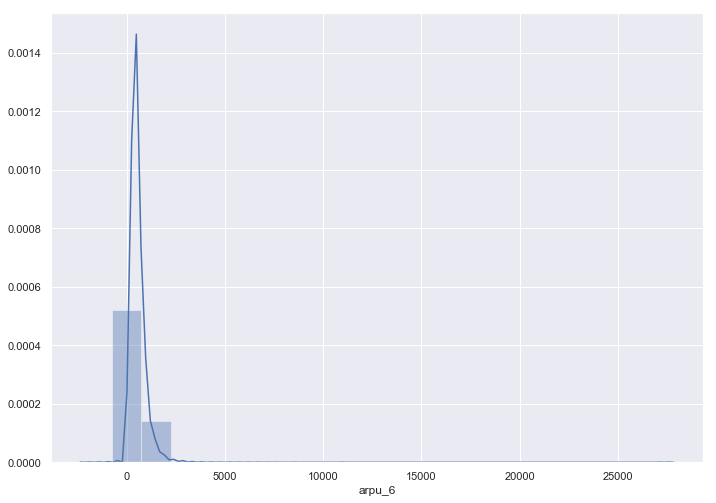

In [39]:
sns.distplot(telecom_hv['arpu_6'], bins = 20)
#sns_bar.set(xlabel='arpu_6', ylabel='Churn', title='arpu_6' + ' vs Churn')

In [40]:
print("Churn-Rate (%): ",100*len(telecom_hvo[telecom_hvo['churn'] == 1])/len(telecom_hvo.index))

Churn-Rate (%):  8.136395453484884


### Preparing Data for PCA & Model-Building

In [41]:
X = telecom_hvo.drop(['churn', 'mobile_number'], axis = 1)
y = telecom_hvo['churn']

In [42]:
X.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,rech_avg
0,197.385,214.816,213.803,265.618262,272.70047,0.00,380.608111,384.994337,0.00,16.408431,12.872921,0.00,27.063178,20.51937,0.00,86.047905,87.235755,0.00,166.263652,165.980922,0.00,6.461494,6.540759,0.00,1.604247,1.92432,0.00,258.781428,259.765948,0.00,168.954534,177.409496,0.00,182.753296,191.345743,0.00,1.836917,1.859332,0.00,353.54854,370.618355,0.00,2.211703,2.144122,0.00,5.925921,7.238206,0.00,0.673323,0.043687,0.0,0.00,0.00,0.00,66.664313,67.851431,0.16,153.195349,154.388675,4.13,15.561152,16.327824,1.15,235.430623,238.577812,5.44,15.170365,15.70257,0.00,29.73539,31.384277,0.00,2.745734,2.849447,0.00,47.65514,49.94001,0.00,0.00,0.00,5.44,0.062165,0.020125,0.0,10.984229,12.09224,0.00,1.17479,1.527682,0.00,4,3,2,362,252,252,252,252,252,21.0,16.0,8.0,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0,0,0,0,0,0,1,1,1,0,0,0,968,30.40,0.00,101.20,3.58,252.0,252.0,252.0,559.0
7,1069.180,1349.850,3171.480,57.840000,54.68000,52.29,453.430000,567.160000,325.91,16.230000,33.490000,31.64,23.740000,12.59000,38.06,51.390000,31.380000,40.28,308.630000,447.380000,162.28,62.130000,55.140000,53.23,0.000000,0.00000,0.00,422.160000,533.910000,255.79,4.300000,23.290000,12.01,49.890000,31.760000,49.14,6.660000,20.080000,16.68,60.86000,75.140000,77.84,0.000000,0.180000,10.01,4.500000,0.000000,6.50,0.000000,0.000000,0.0,487.53,609.24,350.16,58.140000,32.260000,27.31,217.560000,221.490000,121.19,152.160000,101.460000,39.53,427.880000,355.230000,188.04,36.890000,11.83000,30.39,91.44000,126.990000,141.33,52.190000,34.240000,22.21,180.54000,173.08000,193.94,626.46,558.04,428.74,0.210000,0.000000,0.0,2.060000,14.53000,31.59,15.74000,15.190000,15.14,5,5,7,1580,790,3638,1580,790,1580,27.0,25.0,26.0,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.00,0.0,0.0,0.0,1185.0
8,378.721,492.223,137.362,413.690000,351.03000,35.08,94.660000,80.630000,136.48,0.000000,0.000000,0

In [43]:
# Normalizing Data
X_norm =(X-X.mean())/X.std()

In [44]:
len(X.columns)

138

In [45]:
# Splitting train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=100)

In [46]:
# Splitting normalized data to be used in non-PCA model building
X_train_norm, X_test_norm, y_train, y_test = train_test_split(X_norm, y, test_size=0.3,random_state=100)

In [47]:
X_test.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,rech_avg
20296,539.240,537.575,281.034,15.91,5.51,7.99,54.24,14.86,22.36,0.00,0.0,0.00,0.00,0.00,0.00,3.51,3.21,7.99,44.98,4.41,13.99,3.58,1.51,1.69,0.03,0.00,0.00,52.08,9.14,23.69,12.39,2.30,0.00,4.66,8.93,5.74,0.98,0.00,0.91,18.04,11.23,6.66,0.0,0.0,0.0,1.28,3.39,3.09,0.00,0.00,0.0,71.41,23.78,33.46,8.49,5.06,2.64,51.14,32.38,21.04,8.78,15.51,22.96,68.43,52.96,46.66,28.44,0.00,0.00,8.01,1.69,3.64,5.46,0.00,0.00,41.93,1.69,3.64,110.36,54.66,50.31,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,12,11,4,710,747,302,120,150,144,28.0,29.0,11.0,30,150,144,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,667,0.0,0.00,0.00,0.0,0.0,0.0,0.0,728.5
8279,79.431,208.200,78.834,15.88,9.33,9.46,26.61,21.34,3.56,5.76,0.0,3.38,3.89,10.28,5.06,7.89,0.96,2.89,1.11,4.06,0.08,0.00,0.00,0.00,19.09,9.96,2.73,9.01,5.03,2.98,4.21,7.58,2.25,0.00,0.33,0.00,0.00,0.00,0.00,4.21,7.91,2.25,0.0,0.0,0.0,25.36,7.44,2.73,0.00,0.00,0.0,38.59,20.39,7.96,25.51,44.06,5.78,0.30,12.06,2.18,0.00,0.00,0.00,25.81,56.13,7.96,3.61,0.00,16.11,0.00,0.13,0.00,0.00,0.00,0.00,3.61,0.13,16.11,29.43,56.26,24.08,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,5,17,7,74,250,80,30,25,30,29.0,29.0,26.0,17,14,0,2.0,9.0,3.0,34.0,149.0,75.0,168.60,297.22,174.63,0.00,0.00,0.0,0,0,0,2,9,2,0,0,0,0,0,1,731,0.0,0.00,0.00,0.0,68.0,1341.0,225.0,866.5
72269,716.917,721.802,625.488,347.81,227.36,232.86,819.18,809.29,870.48,0.00,0.0,0.00,0.00,0.00,0.00,313.09,162.96,159.09,751.01,697.34,648.71,3.55,0.00,2.59,0.00,0.00,10.04,1067.66,860.31,810.41,34.71,64.39,73.76,46.23,109.18,200.29,3.63,2.76,9.41,84.58,176.34,283.48,0.0,0.0,0.0,14.75,0.00,10.99,2.01,0.00,0.0,1169.01,1036.66,1104.89,93.86,53.26,31.31,352.79,355.58,366.34,12.98,3.91,14.19,459.64,412.76,411.86,7.08,10.35,9.83,11.29,27.53,27.43,5.73,2.20,10.34,24.11,40.08,47.61,484.16,453.41,459.81,0.00,0.0,0.0,0.00,0.00,0.23,0.39,0.56,0.09,12,8,8,937,814,763,128,179,169,29.0,24.0,28.0,128,169,130,2.0,2.0,0.0,90.0,228.0,0.0,1.88,0.13,0.00,4

In [48]:
X_test_norm.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,rech_avg
20296,-0.041791,-0.048371,-0.453349,-0.544889,-0.558240,-0.516783,-0.680162,-0.745779,-0.683775,-0.215134,-0.169902,-0.175611,-0.233003,-0.213606,-0.197575,-0.361208,-0.349746,-0.323008,-0.486831,-0.671611,-0.621413,-0.130345,-0.229432,-0.227889,-0.249891,-0.210183,-0.246850,-0.548633,-0.670417,-0.615247,-0.388304,-0.416399,-0.389690,-0.436186,-0.421391,-0.387427,-0.071547,-0.143269,-0.067655,-0.552919,-0.563385,-0.517057,-0.048236,-0.047078,-0.045366,-0.264734,-0.176790,-0.184237,-0.163946,-0.016321,-0.018085,-0.779385,-0.842959,-0.739807,-0.355813,-0.375632,-0.394735,-0.467625,-0.561524,-0.616163,-0.148369,-0.016650,0.184464,-0.533127,-0.590373,-0.608833,0.170848,-0.189150,-0.203138,-0.221394,-0.281242,-0.246344,0.142135,-0.146044,-0.134051,-0.041682,-0.325985,-0.307311,-0.491324,-0.647756,-0.635738,-0.330883,-0.110674,-0.250066,-0.143182,-0.150845,-0.162206,-0.084003,-0.095504,-0.099706,0.015802,-0.076210,-0.644019,0.087816,0.148519,-0.461951,-0.281120,-0.122397,-0.093209,0.329388,0.377775,-3.005632,-0.493216,0.352271,0.355459,-0.589041,-0.599579,-0.541357,-0.652202,-0.675899,-0.624440,-0.382785,-0.377313,-0.337965,-0.376754,-0.404354,-0.382466,-0.401179,-0.406863,-0.377942,-0.425202,-0.443697,-0.415966,-0.35512,-0.347469,-0.341716,-0.212436,-0.208722,-0.183976,-0.566337,-0.401779,-0.403281,-0.380395,-0.153304,-0.321271,-0.357873,-0.285471,-0.312149
8279,-1.039986,-0.734888,-0.856168,-0.544955,-0.550259,-0.513559,-0.737744,-0.732723,-0.723164,-0.139614,-0.169902,-0.129986,-0.199512,-0.106591,-0.149219,-0.342040,-0.359112,-0.345492,-0.662924,-0.673066,-0.681461,-0.292286,-0.298296,-0.314707,2.775630,0.877696,0.132322,-0.662951,-0.681411,-0.672736,-0.408592,-0.403844,-0.384015,-0.447599,-0.441258,-0.401500,-0.153371,-0.143269,-0.150934,-0.575711,-0.568589,-0.524336,-0.048236,-0.047078,-0.045366,1.107393,0.009271,-0.201999,-0.163946,-0.016321,-0.018085,-0.826890,-0.847685,-0.776211,-0.251714,-0.142326,-0.374913,-0.700577,-0.6550

In [49]:
X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,rech_avg
39186,1086.343,910.298,592.623,5.69,8.28,4.84,151.89,159.01,98.06,28.96,26.66,31.11,6.13,14.38,9.86,5.39,7.39,4.84,21.63,30.58,19.81,1.19,0.00,0.00,0.0,6.40,1.10,28.23,37.98,24.66,0.00,0.00,0.00,2.61,10.89,13.26,0.00,0.00,0.00,2.61,10.89,13.26,120.61,95.48,54.01,0.00,8.55,1.10,0.00,0.0,0.0,151.46,152.91,93.04,15.29,35.24,46.11,134.14,140.98,105.54,7.18,9.74,2.18,156.63,185.98,153.84,0.00,0.00,0.00,17.44,32.93,57.56,0.00,0.00,0.00,17.44,32.93,57.56,433.09,356.41,266.61,0.00,0.0,0.0,259.01,135.48,55.19,0.00,2.01,0.00,8,5,3,1481,892,658,398,459,229,23.0,22.0,29.0,398,35,200,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,3651,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1186.5
39833,513.359,311.602,364.126,144.89,49.84,40.71,321.14,227.63,265.41,0.00,0.00,0.00,0.00,0.00,0.00,64.46,30.58,40.71,277.44,179.54,211.56,12.14,5.18,34.54,0.0,16.51,0.00,354.06,215.31,286.83,80.43,19.26,0.00,31.54,19.59,19.29,0.00,6.78,0.00,111.98,45.64,19.29,0.00,0.00,0.00,0.00,16.51,0.00,0.00,0.0,0.0,466.04,277.48,306.13,27.43,21.46,36.66,143.86,204.43,242.16,91.86,57.33,13.73,263.16,283.23,292.56,15.63,14.01,0.00,29.08,28.99,22.28,35.48,3.90,0.00,80.19,46.91,22.28,402.46,342.28,320.68,0.00,0.0,0.0,52.03,10.75,5.64,7.06,1.38,0.18,8,7,5,576,393,488,110,120,130,24.0,28.0,31.0,110,98,130,2.0,3.0,1.0,196.0,148.0,98.0,10.09,143.24,338.96,345.17,144.03,171.28,0,0,0,2,3,1,0,0,0,0,0,0,2347,184.09,147.56,274.99,0.0,392.0,444.0,98.0,902.5
38778,298.315,314.180,313.407,69.33,77.09,83.28,333.28,298.38,213.34,17.73,42.28,68.41,22.99,21.33,76.69,21.54,11.61,26.54,210.16,218.54,127.33,3.13,6.98,0.00,0.0,0.00,0.00,234.84,237.14,153.88,43.54,61.19,27.16,101.21,55.79,38.88,0.00,0.00,0.00,144.76,116.99,66.04,0.00,0.16,0.00,0.00,0.00,0.00,0.00,0.0,0.0,379.61,354.31,219.93,16.94,27.19,46.71,84.51,141.73,148.01,0.01,0.00,4.74,101.48,168.93,199.48,9.73,7.38,32.43,23.16,36.14,37.18,0.00,0.00,0.00,32.89,43.53,69.61,134.38,226.23,295.31,0.00,0.0,0.0,0.00,13.76,13.33

In [50]:
len(X_train.columns)

138

In [51]:
len(X_train.index)

21000

### Applying PCA
Let's perform principal component analysis to compression the dimensionality of the dataset. 

In [52]:
from sklearn.decomposition import PCA
# Defining two PCA objects for original and normalized dataets
pca = PCA(random_state=42)
pca2 = PCA(random_state=42)
pca.fit(X_train)
pca2.fit(X_train_norm)
print("PCA Components of Original Dataset: ", pca.components_)
print("\nPCA Components of Normalized Dataset: ", pca2.components_)
print("\nLength of PCA Components: ", len(pca.components_))

PCA Components of Original Dataset:  [[ 2.00393262e-02  2.96357252e-02  3.19192202e-02 ...  4.85097831e-01
   4.84227327e-01  4.45411686e-01]
 [ 1.61853302e-01  1.90997843e-01  1.88530857e-01 ...  5.91271738e-03
   1.40382962e-02  2.03405085e-01]
 [-1.03608899e-01 -9.60822638e-02 -5.81004734e-02 ... -3.14074586e-02
   7.65017769e-01 -2.08299161e-01]
 ...
 [-0.00000000e+00  1.24667075e-18 -4.56805965e-19 ...  5.71474097e-04
  -2.17009353e-19 -1.14294819e-03]
 [ 0.00000000e+00  1.79684205e-18 -2.46245128e-18 ...  2.61762103e-05
   2.88009067e-19 -5.23524207e-05]
 [ 0.00000000e+00  2.77463778e-19 -2.47748068e-19 ... -6.22459570e-05
  -3.84988475e-19  1.24491914e-04]]

PCA Components of Normalized Dataset:  [[ 1.67809687e-01  1.78169450e-01  1.74041680e-01 ... -6.73993546e-02
  -5.01632500e-02  4.10417899e-03]
 [ 2.56402923e-02  2.07065037e-02  3.66544977e-02 ...  9.62894251e-02
   8.35196343e-02  1.03018176e-01]
 [ 1.38997185e-01  1.73751127e-01  1.72498198e-01 ...  1.84424729e-01
   1.65

In [53]:
# Checking the explained variance on the pca-dataset
pca.explained_variance_ratio_

array([3.12930739e-01, 1.62080537e-01, 8.18450870e-02, 6.96940006e-02,
       5.94928157e-02, 4.29040249e-02, 3.88510790e-02, 3.47701839e-02,
       3.30714678e-02, 2.74094353e-02, 1.87352818e-02, 1.26629542e-02,
       1.21073875e-02, 1.08106454e-02, 9.24262185e-03, 7.96312471e-03,
       6.99724868e-03, 5.73424373e-03, 4.85761662e-03, 4.39151527e-03,
       3.59062874e-03, 3.56388351e-03, 2.82065013e-03, 2.64471702e-03,
       2.56059718e-03, 2.45769970e-03, 2.35351417e-03, 2.05180573e-03,
       2.03669707e-03, 1.63366300e-03, 1.54124442e-03, 1.41518578e-03,
       1.30284840e-03, 1.10788755e-03, 1.03043242e-03, 9.46949536e-04,
       8.18696351e-04, 7.56077557e-04, 6.69444305e-04, 6.14235971e-04,
       5.07582755e-04, 4.91273196e-04, 4.63612391e-04, 4.39409820e-04,
       4.32866439e-04, 4.16403560e-04, 3.90004365e-04, 3.80395130e-04,
       3.51390395e-04, 3.06971398e-04, 2.86684661e-04, 2.75839938e-04,
       2.66753983e-04, 2.44967595e-04, 2.37445672e-04, 2.32102037e-04,
      

In [54]:
len(pca.explained_variance_ratio_)

138

In [55]:
sns.set()
sns.set(rc={'figure.figsize':(15,10)})

### Let's visualize the optimal number of dimensions required

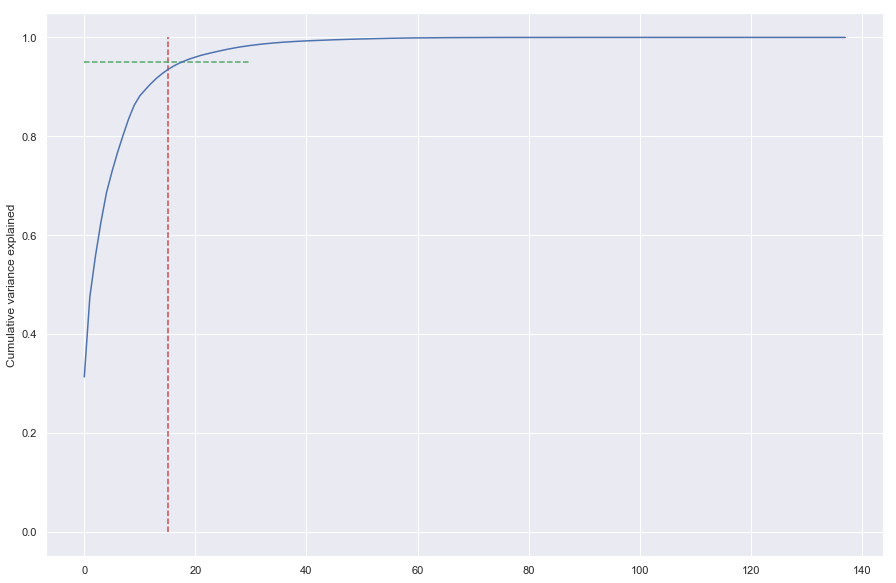

In [56]:
# Original Dataset
var_cumu = np.cumsum(pca.explained_variance_ratio_)
fig = plt.figure(figsize=[15,10])
plt.vlines(x=15, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

From the above plot, we can conclude that the optimal number of PCA dimensions lies between 18 - 20. We will go with 19. 

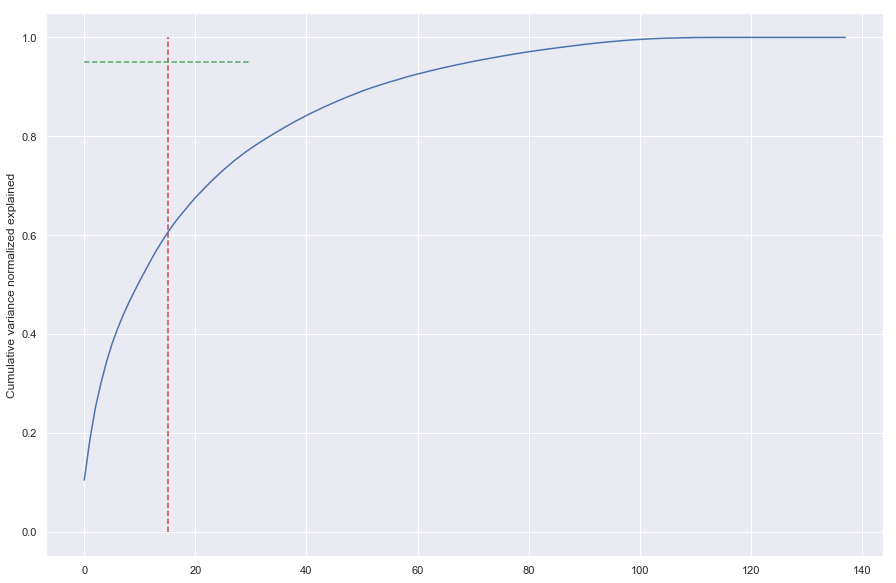

In [57]:
# Normalized Dataset
var_cumu2 = np.cumsum(pca2.explained_variance_ratio_)
fig = plt.figure(figsize=[15,10])
plt.vlines(x=15, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu2)
plt.ylabel("Cumulative variance normalized explained")
plt.show()

From the above plot, we can conclude that PCA doesn't work well on normalized datasets

### Applying Incremental PCA
Let's perform incremental PCA to fit the optimal PCA components

In [58]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=19)
df_train_pca = pca_final.fit_transform(X_train)
df_test_pca = pca_final.transform(X_test)
print("Train-set shape: ",df_train_pca.shape)
print("Test-set shape: ",df_test_pca.shape)

Train-set shape:  (21000, 19)
Test-set shape:  (9001, 19)


In [59]:
df_train_pca

array([[ -741.74294893,  -707.65381598,  -702.43657837, ...,
         -254.22895612,  -196.32566955,  -566.06359845],
       [ -380.87889656,  -939.95019269,  -384.63059204, ...,
           79.81561971,    61.78978008,    54.27031462],
       [ -993.57235985, -1121.51926914,   -88.04279507, ...,
           21.9165166 ,   -15.48723422,   135.56522436],
       ...,
       [ -863.55844322, -1997.13321301,   268.75986312, ...,
          -24.68788021,   -81.93548561,  -268.58225027],
       [-1125.27024709,   250.08507583,  -158.46252944, ...,
          782.06926695,  -610.17413438,  -588.32455805],
       [-1199.88859662,  5037.86096302,   -19.63262061, ...,
         -523.12491276,   384.30620932,  -578.81576373]])

## Model Building With PCA Dataset

Let's experiment model building and evaluation with the PCA dataset by leveraging the following algorithms:
<ul><li>1. Logistic Regression</li> <li>2. Random Forest </li> <li>3. XG Boost </li> <ul>

### 1. Logistic Regression

In [60]:
# 1. Logistic Regression
from sklearn.linear_model import LogisticRegression
learner_pca = LogisticRegression()
model_pca = learner_pca.fit(df_train_pca, y_train)
pred_probs_test = model_pca.predict_proba(df_test_pca)[:,1]
churn_pred = model_pca.predict(df_test_pca)
#print(np.where(churn_pred == 1))
# Logistic Regression: Model Evaluation
from sklearn.metrics import roc_auc_score
print("AUC Score on churn prediction Labels{:2.2}".format(roc_auc_score(y_test, churn_pred)))
print("AUC Score on predicted probabilities{:2.2}".format(roc_auc_score(y_test, pred_probs_test)))
from sklearn.metrics import classification_report
print("\nClassification Report:\n", classification_report(y_test,churn_pred))

AUC Score on churn prediction Labels0.56
AUC Score on predicted probabilities0.85

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96      8251
           1       0.60      0.13      0.21       750

    accuracy                           0.92      9001
   macro avg       0.76      0.56      0.58      9001
weighted avg       0.90      0.92      0.90      9001



In [61]:
# We see that the recall is quite low for Churn and hence we apply a temporary method to handle the class imbalance.
# We remove the extra data points which are related to the one class and not the other.
# We do this by first checking the number of rows of first class (lesser number) and then 
# selecting only those man rows from another class
# Note:- We have applied the SMOTE at later stage. We want to see how the accuracy comes out to be .....

### Treating Class Imbalance - I

In [62]:
# Treating class imbalance
print("Treating class imbalance, Number(Churn=1): ",len(telecom_hvo[telecom_hvo['churn'] == 1]))
print("Treating class imbalance, Number(Churn=0): ",len(telecom_hvo[telecom_hvo['churn'] == 0]))
telecom_hvo_bal = telecom_hvo[telecom_hvo['churn'] == 1]
telecom_hvo_bal = pd.concat([telecom_hvo_bal,telecom_hvo[telecom_hvo['churn'] == 0].head(3096)], ignore_index=True)
X_bal = telecom_hvo_bal.drop(['churn', 'mobile_number'], axis = 1)
y_bal = telecom_hvo_bal['churn']
X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(X_bal, y_bal, test_size=0.3,random_state=100)
print("Addressed class imbalance, Number(Churn=1): ",len(np.where(y_train_bal == 1)[0]),",",len(np.where(y_test_bal == 1)[0]))
print("Addressed class imbalance, Number(Churn=0): ",len(np.where(y_train_bal == 0)[0]),",",len(np.where(y_test_bal == 0)[0]))

Treating class imbalance, Number(Churn=1):  2441
Treating class imbalance, Number(Churn=0):  27560
Addressed class imbalance, Number(Churn=1):  1683 , 758
Addressed class imbalance, Number(Churn=0):  2192 , 904


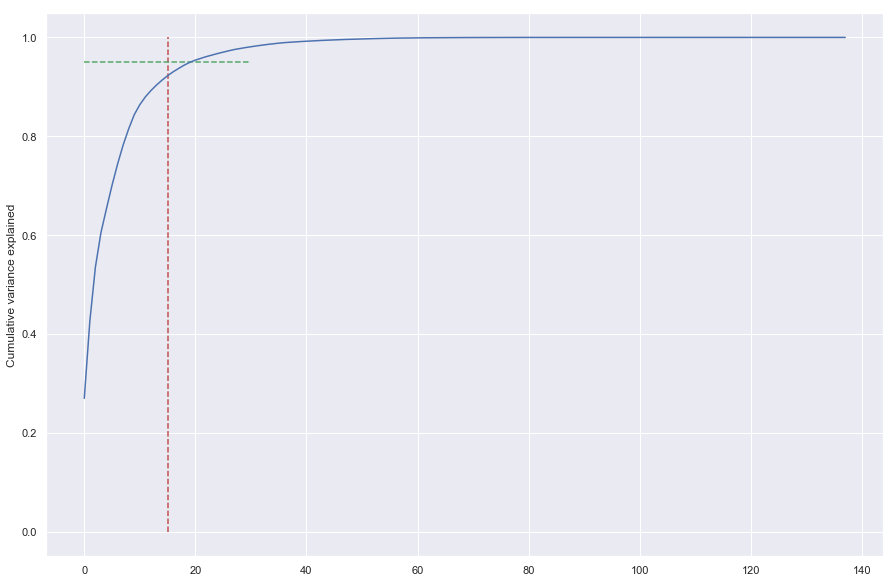

In [63]:
# Applying PCA
pca3 = PCA(random_state=42)
pca3.fit(X_train_bal)
var_cumu3 = np.cumsum(pca3.explained_variance_ratio_)
fig = plt.figure(figsize=[15,10])
plt.vlines(x=15, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu3)
plt.ylabel("Cumulative variance explained")
plt.show()

In [64]:
# As per the above plot, let's perform incremental PCA with 20 components
pca_final_bal = IncrementalPCA(n_components=20)
df_train_pca_bal = pca_final.fit_transform(X_train_bal)
df_test_pca_bal = pca_final.transform(X_test_bal)

In [65]:
# Model Building-II for Logistic Regression
learner_pca_bal = LogisticRegression(max_iter = 100)
model_pca_bal = learner_pca_bal.fit(df_train_pca_bal, y_train_bal)
pred_probs_bal = model_pca_bal.predict_proba(df_test_pca_bal)[:,1]
churn_pred_bal = model_pca_bal.predict(df_test_pca_bal)
print("AUC Score on churn prediction Labels{:2.2}: ".format(roc_auc_score(y_test_bal, churn_pred_bal)))
print("AUC Score on churn prediction Labels{:2.2}: ".format(roc_auc_score(y_test_bal, pred_probs_bal)))
print("\nClassification Report:\n",classification_report(y_test_bal,churn_pred_bal))

AUC Score on churn prediction Labels0.78: 
AUC Score on churn prediction Labels0.85: 

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.83      0.81       904
           1       0.78      0.74      0.76       758

    accuracy                           0.79      1662
   macro avg       0.79      0.78      0.78      1662
weighted avg       0.79      0.79      0.79      1662



#### The recall has improved a lot (to 0.83) . Let's see how other algorithms perform

### 2. Random Forest

In [66]:
# 2. Lets try the Random Forest Classifier on the above transformed data
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
# Running the random forest with default parameters.
rfc_pca_bal = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=10,
                             n_estimators=100)
# lets fit the dataset
rfm_pca = rfc_pca_bal.fit(df_train_pca_bal,y_train_bal)
rfm_pca_pred_bal = rfm_pca.predict(df_test_pca_bal)
# Printing feature importance
for i,v in enumerate(rfm_pca.feature_importances_):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.05932
Feature: 1, Score: 0.01350
Feature: 2, Score: 0.06343
Feature: 3, Score: 0.34468
Feature: 4, Score: 0.15914
Feature: 5, Score: 0.01816
Feature: 6, Score: 0.01079
Feature: 7, Score: 0.03758
Feature: 8, Score: 0.00260
Feature: 9, Score: 0.00566
Feature: 10, Score: 0.05968
Feature: 11, Score: 0.01248
Feature: 12, Score: 0.08560
Feature: 13, Score: 0.00837
Feature: 14, Score: 0.01251
Feature: 15, Score: 0.06724
Feature: 16, Score: 0.03231
Feature: 17, Score: 0.00456
Feature: 18, Score: 0.00238


In [67]:
print("AUC Score on churn prediction Labels: {:2.2}".format(roc_auc_score(y_test_bal, rfm_pca_pred_bal)))

AUC Score on churn prediction Labels: 0.74


In [68]:
# Model Buidling - II For Random Forest
rfc_pca2_bal = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=15,
                             n_estimators=100)
# fit
rfm_pca2_bal = rfc_pca2_bal.fit(df_train_pca_bal,y_train_bal)
rfm_pca2_pred_bal = rfm_pca2_bal.predict(df_test_pca_bal)
print("AUC Score on churn prediction Labels: {:2.2}".format(roc_auc_score(y_test_bal, rfm_pca2_pred_bal)))

AUC Score on churn prediction Labels: 0.74


In [69]:
# Finding the optimal hyper-parameters for Random Forest Classifier with GridSearch CV
from sklearn.model_selection import GridSearchCV

In [70]:
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
rf_gscv = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf_gscv, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)
grid_search.fit(df_train_pca_bal, y_train_bal)
# printing the optimal accuracy score and hyperparameters
print('Best Grid Search Score: ',grid_search.best_score_,' Best Params: ',grid_search.best_params_)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   31.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:  2.5min finished


Best Grid Search Score:  0.7708386791464924  Best Params:  {'max_depth': 8, 'max_features': 5, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 100}


In [71]:
# Model Building - III: model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc_optimal = RandomForestClassifier(bootstrap=True,
                             max_depth=8,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=5,
                             n_estimators=300)
rfc_optimal.fit(df_train_pca_bal,y_train_bal)
# predict
predictions = rfc_optimal.predict(df_test_pca_bal)
print("AUC Score: {:2.2}".format(roc_auc_score(y_test_bal, predictions)))
print("\nClassification Report\n", classification_report(y_test_bal,predictions))

AUC Score: 0.74

Classification Report
               precision    recall  f1-score   support

           0       0.74      0.84      0.78       904
           1       0.77      0.64      0.70       758

    accuracy                           0.75      1662
   macro avg       0.75      0.74      0.74      1662
weighted avg       0.75      0.75      0.75      1662



### 3. XGBoost 

In [72]:
# 3. XGBoost Model Building - I
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

In [73]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True, n_jobs = -1)
model_cv.fit(df_train_pca_bal, y_train_bal)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    8.8s finished


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=2, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=200, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, va

In [74]:
print('Best Grid Search Score: ',model_cv.best_score_,' Best Params: ',model_cv.best_params_)

Best Grid Search Score:  0.8633288408456486  Best Params:  {'learning_rate': 0.2, 'subsample': 0.9}


In [75]:
xgb_optimal = XGBClassifier(max_depth=2, n_estimators=200, learning_rate=0.2, subsample=0.9)
xgb_optimal.fit(df_train_pca_bal, y_train_bal)
xgb_optimal_pred = xgb_optimal.predict(df_test_pca_bal)
print("AUC Score: {:2.2}".format(roc_auc_score(y_test_bal, xgb_optimal_pred)))
print("\nClassification Report: \n",classification_report(y_test_bal,xgb_optimal_pred))

AUC Score: 0.78

Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.82      0.81       904
           1       0.78      0.74      0.76       758

    accuracy                           0.79      1662
   macro avg       0.79      0.78      0.79      1662
weighted avg       0.79      0.79      0.79      1662



### Treating Class Imbalance - II (SMOTE)

Let's try Synthetic Minority Over-sampling Technique (SMOTE) to treat the class imbalance

In [76]:
# Handling Class Imbalance
# !pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=27)
print("Treating class imbalance, Number(Churn=1): ",len(np.where(y == 1)[0]))
print("Treating class imbalance, Number(Churn=0): ",len(np.where(y == 0)[0]))
X_bal2, y_bal2 = sm.fit_sample(X, y)
print("Treating class imbalance, Number(Churn=1): ",len(np.where(y_bal2 == 1)[0]))
print("Treating class imbalance, Number(Churn=0): ",len(np.where(y_bal2 == 0)[0]))
# Splitting to train and test set again
X_train_bal2, X_test_bal2, y_train_bal2, y_test_bal2 = train_test_split(X_bal2, y_bal2, test_size=0.3,random_state=100)

Treating class imbalance, Number(Churn=1):  2441
Treating class imbalance, Number(Churn=0):  27560
Treating class imbalance, Number(Churn=1):  27560
Treating class imbalance, Number(Churn=0):  27560


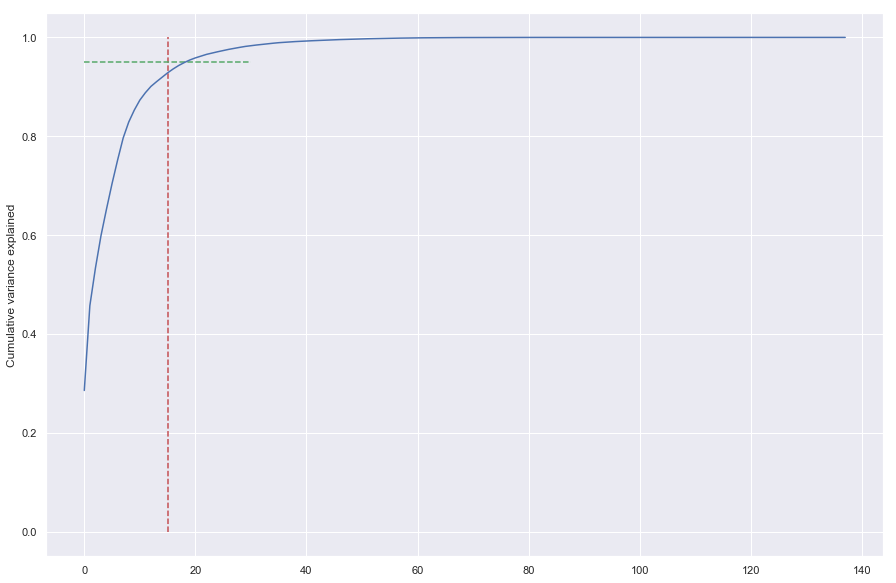

In [77]:
# Applying PCA to the resampled SMOTE dataset
pca4 = PCA(random_state=42)
pca4.fit(X_train_bal2)
var_cumu4 = np.cumsum(pca4.explained_variance_ratio_)
fig = plt.figure(figsize=[15,10])
plt.vlines(x=15, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu4)
plt.ylabel("Cumulative variance explained")
plt.show()

In [78]:
# Applying incremental PCA
pca_final_bal2 = IncrementalPCA(n_components=20)
df_train_pca_bal2 = pca_final_bal2.fit_transform(X_train_bal2)
df_test_pca_bal2 = pca_final_bal2.transform(X_test_bal2)

In [79]:
# 1. Logistic Regression
# Model Building-III for Logistic Regression
learner_pca_bal2 = LogisticRegression()
model_pca_bal2 = learner_pca_bal2.fit(df_train_pca_bal2, y_train_bal2)
pred_probs_bal2 = model_pca_bal2.predict_proba(df_test_pca_bal2)[:,1]
churn_pred_bal2 = model_pca_bal2.predict(df_test_pca_bal2)
print("AUC Score On Class Probabilities: {:2.2}".format(roc_auc_score(y_test_bal2, pred_probs_bal2)))
print("AUC Score On Predicted Labels: {:2.2}".format(roc_auc_score(y_test_bal2, pred_probs_bal2)))
print("\nClassification Report: \n",classification_report(y_test_bal2, churn_pred_bal2))

AUC Score On Class Probabilities: 0.88
AUC Score On Predicted Labels: 0.88

Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.78      0.80      8240
           1       0.79      0.84      0.82      8296

    accuracy                           0.81     16536
   macro avg       0.81      0.81      0.81     16536
weighted avg       0.81      0.81      0.81     16536



In [80]:
# 2. Random Forest
# Model Building 4 with Random Forest
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [50,100], 
    'max_features': [5, 10]
}
# Create a based model
rf_gscv2 = RandomForestClassifier()
# Instantiate the grid search model
grid_search2 = GridSearchCV(estimator = rf_gscv, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)
grid_search2.fit(df_train_pca_bal2, y_train_bal2)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed: 13.3min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [4, 8, 10], 'max_features': [5, 10],
                         'min_samples_leaf': range(100, 400, 200),
                         'min_samples_split': range(200, 500, 200),
                         'n_estimators': [50, 100]},
             verbose=1)

In [81]:
# Using the best fit to train the optimal random-forest model
best_rf = grid_search2.best_estimator_
best_rf.fit(df_train_pca_bal2, y_train_bal2)
bestrf_results = best_rf.predict(df_test_pca_bal2)
print("AUC Score: {:2.2}".format(roc_auc_score(y_test_bal2, bestrf_results)))
print(classification_report(y_test_bal2, bestrf_results))

AUC Score: 0.83
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      8240
           1       0.83      0.83      0.83      8296

    accuracy                           0.83     16536
   macro avg       0.83      0.83      0.83     16536
weighted avg       0.83      0.83      0.83     16536



In [82]:
# 3. XGBoost
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3
# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          
# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)
# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True, n_jobs = -1)
model_cv.fit(df_train_pca_bal2, y_train_bal2)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  2.0min finished


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=2, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=200, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, va

In [83]:
# Fitting the optimal model
print('Best Grid Search Score: ',model_cv.best_score_,' Best Params: ',model_cv.best_params_)
xgb_optimal = XGBClassifier(max_depth=2, n_estimators=200, learning_rate=0.2, subsample=0.9)
xgb_optimal.fit(df_train_pca_bal2, y_train_bal2)
xgb_optimal_pred = xgb_optimal.predict(df_test_pca_bal2)
print("AUC Score: {:2.2}".format(roc_auc_score(y_test_bal2, xgb_optimal_pred)))
print("\nClassification Report: \n",classification_report(y_test_bal2,xgb_optimal_pred))

Best Grid Search Score:  0.914375021614954  Best Params:  {'learning_rate': 0.6, 'subsample': 0.9}
AUC Score: 0.84

Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.83      0.84      8240
           1       0.84      0.85      0.84      8296

    accuracy                           0.84     16536
   macro avg       0.84      0.84      0.84     16536
weighted avg       0.84      0.84      0.84     16536



## Model Comparision
1. Logistic Regression: AUC Score: 0.88, F1 Score: 0.82
2. Random Forest: AUC Score: 0.83, F1 Score:  0.83
3. XG Boost: AUC Score: 0.84, F1 Score: 0.84

<b> Hence, we can conclude that, using a simple learning algorithm will also be tangible enough for model building, because, we don't observe a significant performance increase by leveraging other algorithms <b>

## Model Building Without PCA

Let's build a lasso-regression model without PCA on the dataset, to dtermine the best features

In [84]:
from sklearn.linear_model import Lasso

In [85]:
# Normalizing Data for X_train_bal2 & X_test_bal2
X_train_bal2_norm =(X_train_bal2-X_train_bal2.mean())/X_train_bal2.std()
X_test_bal2_norm = (X_test_bal2-X_test_bal2.mean())/X_test_bal2.std()

In [86]:
# Applying Lasso regression for the whole dataset

# Lets make the Lasso Regression model now
lasso = Lasso()
params_lasso = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 
                          0.003, 0.004, 0.005, 0.01,0.02,0.03,0.04,0.05,0.5,1,10]}
# cross validation
model_cv_lasso = GridSearchCV(estimator = lasso, 
                        param_grid = params_lasso, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1, n_jobs= -1)            

model_cv_lasso.fit(X_train_bal2_norm, y_train_bal2) 

Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:  3.3min finished
c:\program files\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 167.51102203702976, tolerance: 0.9645979680696712
  positive)


GridSearchCV(cv=3, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01,
                                   0.02, 0.03, 0.04, 0.05, 0.5, 1, 10]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [87]:
# Making a resultant dataframe
cv_results_lasso = pd.DataFrame(model_cv_lasso.cv_results_)
cv_results_lasso = cv_results_lasso[cv_results_lasso['param_alpha']<=0.3]
cv_results_lasso.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,28.259023,0.133417,0.025655,0.006547,0.0001,{'alpha': 0.0001},-0.247236,-0.247637,-0.246174,-0.247016,0.000618,1,-0.245530,-0.245274,-0.246098,-0.245634,0.000344
1,29.704009,2.266396,0.042657,0.013875,0.0002,{'alpha': 0.0002},-0.247441,-0.247729,-0.246464,-0.247211,0.000541,2,-0.245768,-0.245504,-0.246337,-0.245870,0.000347
2,30.138242,1.503326,0.037069,0.010783,0.0003,{'alpha': 0.0003},-0.247687,-0.247870,-0.246803,-0.247453,0.000466,3,-0.246046,-0.245784,-0.246612,-0.246147,0.000345
3,29.101075,0.155991,0.053641,0.011075,0.0004,{'alpha': 0.0004},-0.247989,-0.248075,-0.247195,-0.247753,0.000396,4,-0.246412,-0.246124,-0.246937,-0.246491,0.000337
4,32.247811,0.526767,0.032313,0.006181,0.0005,{'alpha': 0.0005},-0.248340,-0.248360,-0.247599,-0.248099,0.000354,5,-0.246784,-0.246519,-0.247292,-0.246865,0.000321


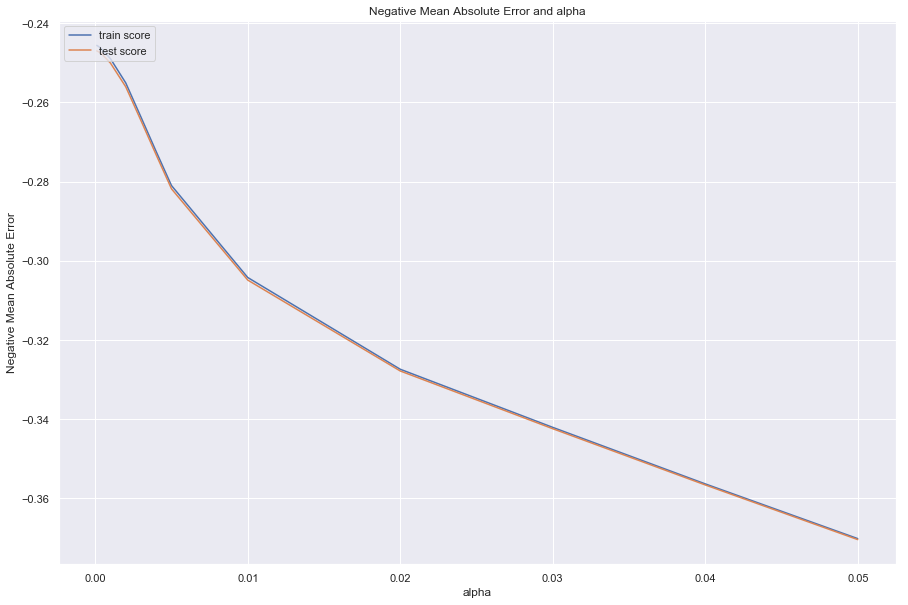

In [88]:
# plotting mean test and train scoes with alpha 
cv_results_lasso['param_alpha'] = cv_results_lasso['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results_lasso['param_alpha'], cv_results_lasso['mean_train_score'])
plt.plot(cv_results_lasso['param_alpha'], cv_results_lasso['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [89]:
# Lets try to fit the Lasso regression model and see what we get as coefficient
lasso_model_1 = Lasso(alpha=0.01)
lasso_model_1.fit(X_train_bal2_norm,y_train_bal2)
print(lasso_model_1.coef_)
print(np.shape(np.where(lasso_model_1.coef_>0)))
lasso_predictions = lasso_model_1.predict(X_test_bal2_norm)
print(lasso_predictions)
print("AUC-Score: {:2.2}".format(roc_auc_score(y_test_bal2, lasso_predictions)))

[ 1.64709125e-02  2.06139405e-02 -7.02188268e-03  0.00000000e+00
  0.00000000e+00  7.20390075e-02  0.00000000e+00  0.00000000e+00
  6.65945883e-02  0.00000000e+00  0.00000000e+00  1.14029046e-02
  0.00000000e+00  1.58791718e-02  1.77856877e-03  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  6.55514994e-04  3.57288837e-03
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  2.14754556e-02
  2.79360075e-02  9.33961451e-03  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -2.03108824e-01  0.00000000e+00  0.00000000e+00
  4.34399433e-03  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000

<b> Hence, we obtain an AUC-Score of 0.93 with alpha = 0.01. Let's identify the top features. <b>

In [90]:
# Identifying top features
lasso1_df = pd.DataFrame()
lasso1_df['Features'] = X_train.columns.tolist()
lasso1_df['Coefficients'] = lasso_model_1.coef_.tolist()
lasso1_df

,Features,Coefficients
0,arpu_6,0.016471
1,arpu_7,0.020614
2,arpu_8,-0.007022
3,onnet_mou_6,0.000000
4,onnet_mou_7,0.000000
5,onnet_mou_8,0.072039
6,offnet_mou_6,0.000000
7,offnet_mou_7,0.000000
8,offnet_mou_8,0.066595
9,roam_ic_mou_6,0.000000


In [91]:
lasso1_df = lasso1_df[lasso1_df['Coefficients'] != 0.00]
lasso1_df

,Features,Coefficients
0,arpu_6,0.016471
1,arpu_7,0.020614
2,arpu_8,-0.007022
5,onnet_mou_8,0.072039
8,offnet_mou_8,0.066595
11,roam_ic_mou_8,0.011403
13,roam_og_mou_7,0.015879
14,roam_og_mou_8,0.001779
34,std_og_t2m_mou_7,0.000656
35,std_og_t2m_mou_8,0.003573


<b> The above are the 46 topmost features<b>

In [92]:
len(lasso1_df.index)

46

In [93]:
from sklearn.feature_selection import RFE

In [94]:
X_train_rfe = X_train_bal2_norm[lasso1_df.Features.tolist()]
lm = LogisticRegression()
lm.fit(X_train_rfe, y_train_bal2)

rfe = RFE(lm, 15) # running RFE
rfe = rfe.fit(X_train_rfe, y_train_bal2)

c:\program files\python37\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=15 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [95]:
col = X_train_rfe.columns[rfe.support_].tolist()
rfe_df = pd.DataFrame(list(zip(X_train_rfe.columns,rfe.support_,rfe.ranking_)), 
                      columns = ['Features', 'RFE_Support', 'RFE_Ranking'])
rfe_df_final = rfe_df[rfe_df.RFE_Support == True].sort_values('RFE_Ranking')
rfe_df_final

,Features,RFE_Support,RFE_Ranking
1,arpu_7,True,1
3,onnet_mou_8,True,1
4,offnet_mou_8,True,1
12,std_og_mou_8,True,1
13,total_og_mou_8,True,1
16,loc_ic_mou_7,True,1
19,std_ic_mou_8,True,1
20,total_ic_mou_8,True,1
27,date_of_last_rech_8,True,1
29,last_day_rch_amt_8,True,1


In [96]:
X_train_selected = X_train_rfe[rfe_df_final.Features.tolist()]
X_test_selected = X_test_bal2_norm[rfe_df_final.Features.tolist()]
churn_model_final = LogisticRegression()
churn_model_final.fit(X_train_selected, y_train_bal2)
pred = churn_model_final.predict(X_test_selected)
print("AUC-Score: {:2.2}".format(roc_auc_score(y_test_bal2, pred)))
print("Classification Report: \n", classification_report(y_test_bal2, pred))
print("Accuracy Score: ", accuracy_score(y_test_bal2, pred))

AUC-Score: 0.87
Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.85      0.86      8240
           1       0.86      0.88      0.87      8296

    accuracy                           0.87     16536
   macro avg       0.87      0.87      0.87     16536
weighted avg       0.87      0.87      0.87     16536

Accuracy Score:  0.8660498306724722


### Hence, we obtain an AUC-Score of 0.87 for logistic regression

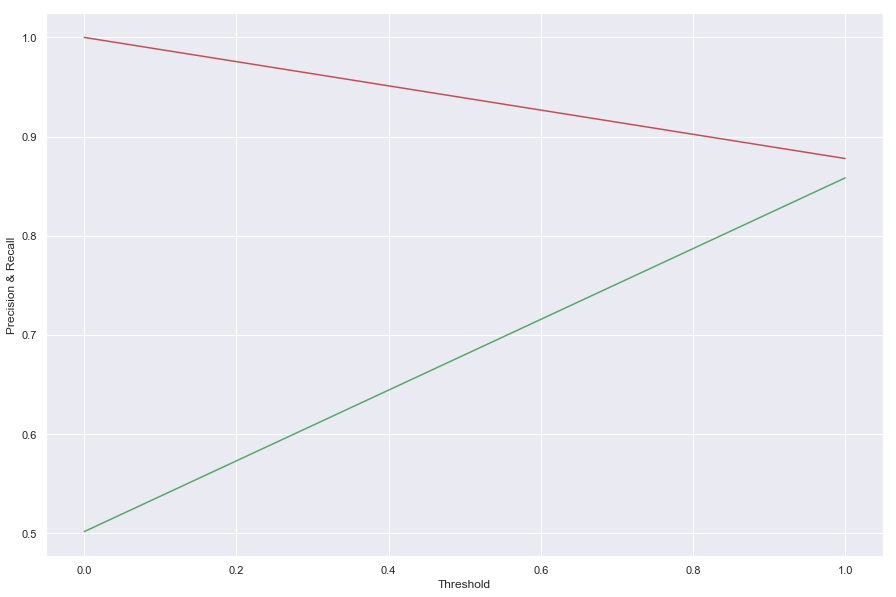

In [101]:
# Plotting Precisoin-Recall Curve
from sklearn.metrics import precision_recall_curve

p, r, thresholds = precision_recall_curve(y_test_bal2, pred)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.xlabel('Threshold')
plt.ylabel('Precision & Recall')
plt.show()

In [97]:
print("Churn-Rate: ", len(np.where(pred == 1)[0])/len(y_test_bal2))

Churn-Rate:  0.5131228834059023


### Business Insights
As per the analysis, we can conclude the following about model-building and evaluation:
1. Going for simpler models can alsp help us achieve satisfying results. Complex models in this case, don't exhibit a significant increase in performance. 
2. Logistic regression for PCA dataset followed by a lasso-regression can help us in cross-evaluating model performance and feature selection in this scenario. 
3. Classification report that highlights the F1-Score, Precision and Recall, along with AUC-Score seem to be good evaluation metrics. 

The topmost features that we observed for the telecom-churn analysis are:

<b>'arpu_7', 'onnet_mou_8', 'offnet_mou_8', 'std_og_mou_8', 'total_og_mou_8', 'loc_ic_mou_7',
'std_ic_mou_8', 'total_ic_mou_8', 'date_of_last_rech_8', 'last_day_rch_amt_8', 'monthly_2g_7',
'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'sep_vbc_3g'</b>